## Problem 3

##### Prediction's accuracy depending on the batch size

In [1]:
batch_size_array = []
accuracy_array = []
execution_time_array = []

import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import time

# Step 1: Read in data
# using TF Learn's built in function to load MNIST data to the folder mnist
mnist = input_data.read_data_sets('./mnist', one_hot=True)




Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


In [2]:
"""
Simple logistic regression model to solve OCR task 
with MNIST in TensorFlow
MNIST dataset: yann.lecun.com/exdb/mnist/

"""

# Define paramaters for the model
learning_rate = 0.01
batch_size = 8
n_epochs = 30



# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
Y = tf.placeholder(tf.float32, [batch_size, 10], name='Y_placeholder')

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name="bias")

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
	# to visualize using TensorBoard
	writer = tf.summary.FileWriter('./logistic_reg', sess.graph)

	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	for i in range(n_epochs): # train the model n_epochs times
		total_loss = 0

		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			_, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print ('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print ('Total time: {0} seconds'.format(time.time() - start_time))
	execution_time_array.append(time.time() - start_time)

	print('Optimization Finished!') # should be around 0.35 after 25 epochs
	
	# test the model
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	for i in range(n_batches):
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		_, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch}) 
		preds = tf.nn.softmax(logits_batch)
		correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
		accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
		total_correct_preds += sess.run(accuracy)
	print ('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
	batch_size_array.append(batch_size)
	accuracy_array.append(total_correct_preds/mnist.test.num_examples)
	print execution_time_array
	print batch_size_array
	print accuracy_array
	writer.close()


Average loss epoch 0: 0.51453666064
Average loss epoch 1: 0.353858619801
Average loss epoch 2: 0.327117213843
Average loss epoch 3: 0.313448230271
Average loss epoch 4: 0.30424589073
Average loss epoch 5: 0.298021698803
Average loss epoch 6: 0.292721647128
Average loss epoch 7: 0.288947734166
Average loss epoch 8: 0.285468569932
Average loss epoch 9: 0.282468648653
Average loss epoch 10: 0.280053560026
Average loss epoch 11: 0.278254314146
Average loss epoch 12: 0.276203185275
Average loss epoch 13: 0.274515085229
Average loss epoch 14: 0.272890597633
Average loss epoch 15: 0.271541728993
Average loss epoch 16: 0.270309704783
Average loss epoch 17: 0.269229754018
Average loss epoch 18: 0.268038138859
Average loss epoch 19: 0.26693008437
Average loss epoch 20: 0.266104395678
Average loss epoch 21: 0.265063562233
Average loss epoch 22: 0.264341878011
Average loss epoch 23: 0.263687922481
Average loss epoch 24: 0.262617497842
Average loss epoch 25: 0.261678206002
Average loss epoch 26: 0.

In [3]:

# Define paramaters for the model
learning_rate = 0.01
batch_size = 64
n_epochs = 30



# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
Y = tf.placeholder(tf.float32, [batch_size, 10], name='Y_placeholder')

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name="bias")

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
	# to visualize using TensorBoard
	writer = tf.summary.FileWriter('./logistic_reg', sess.graph)

	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	for i in range(n_epochs): # train the model n_epochs times
		total_loss = 0

		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			_, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print ('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print ('Total time: {0} seconds'.format(time.time() - start_time))
	execution_time_array.append(time.time() - start_time)

	print('Optimization Finished!') # should be around 0.35 after 25 epochs
	
	# test the model
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	for i in range(n_batches):
		print "Test:" + str(i)
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		_, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch}) 
		preds = tf.nn.softmax(logits_batch)
		correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
		accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
		total_correct_preds += sess.run(accuracy)
	print ('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
	batch_size_array.append(batch_size)
	accuracy_array.append(total_correct_preds/mnist.test.num_examples)
	print execution_time_array
	print batch_size_array
	print accuracy_array
	writer.close()


Average loss epoch 0: 1.00850171781
Average loss epoch 1: 0.56870411692
Average loss epoch 2: 0.484888928039
Average loss epoch 3: 0.444000070427
Average loss epoch 4: 0.418868402316
Average loss epoch 5: 0.401101127093
Average loss epoch 6: 0.387640372535
Average loss epoch 7: 0.377223302342
Average loss epoch 8: 0.368860641687
Average loss epoch 9: 0.361806076276
Average loss epoch 10: 0.355682304474
Average loss epoch 11: 0.350392118686
Average loss epoch 12: 0.345650885571
Average loss epoch 13: 0.341589188912
Average loss epoch 14: 0.337917564651
Average loss epoch 15: 0.334667555485
Average loss epoch 16: 0.331613609327
Average loss epoch 17: 0.328859893811
Average loss epoch 18: 0.326415444463
Average loss epoch 19: 0.324030694536
Average loss epoch 20: 0.321852518469
Average loss epoch 21: 0.319766572264
Average loss epoch 22: 0.317937117135
Average loss epoch 23: 0.316149675961
Average loss epoch 24: 0.31446514996
Average loss epoch 25: 0.312955318225
Average loss epoch 26: 0.

In [4]:

# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 30



# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
Y = tf.placeholder(tf.float32, [batch_size, 10], name='Y_placeholder')

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name="bias")

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
	# to visualize using TensorBoard
	writer = tf.summary.FileWriter('./logistic_reg', sess.graph)

	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	for i in range(n_epochs): # train the model n_epochs times
		total_loss = 0

		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			_, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print ('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print ('Total time: {0} seconds'.format(time.time() - start_time))
	execution_time_array.append(time.time() - start_time)

	print('Optimization Finished!') # should be around 0.35 after 25 epochs
	
	# test the model
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	for i in range(n_batches):
		print "Test:" + str(i)
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		_, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch}) 
		preds = tf.nn.softmax(logits_batch)
		correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
		accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
		total_correct_preds += sess.run(accuracy)
	print ('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
	batch_size_array.append(batch_size)
	accuracy_array.append(total_correct_preds/mnist.test.num_examples)
	print execution_time_array
	print batch_size_array
	print accuracy_array
	writer.close()


Average loss epoch 0: 1.28842262719
Average loss epoch 1: 0.732656761205
Average loss epoch 2: 0.60027062233
Average loss epoch 3: 0.536507627
Average loss epoch 4: 0.497711298766
Average loss epoch 5: 0.470890493312
Average loss epoch 6: 0.451249177709
Average loss epoch 7: 0.435931822706
Average loss epoch 8: 0.423389143321
Average loss epoch 9: 0.412992481655
Average loss epoch 10: 0.404197049898
Average loss epoch 11: 0.396646488449
Average loss epoch 12: 0.390255042549
Average loss epoch 13: 0.384551130669
Average loss epoch 14: 0.379007806207
Average loss epoch 15: 0.374547844583
Average loss epoch 16: 0.370369740959
Average loss epoch 17: 0.366399738651
Average loss epoch 18: 0.363041177844
Average loss epoch 19: 0.359593847797
Average loss epoch 20: 0.356826384654
Average loss epoch 21: 0.353729384033
Average loss epoch 22: 0.350896583848
Average loss epoch 23: 0.348595708713
Average loss epoch 24: 0.346321018669
Average loss epoch 25: 0.344205058191
Average loss epoch 26: 0.34

In [5]:

# Define paramaters for the model
learning_rate = 0.01
batch_size = 256
n_epochs = 30



# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
Y = tf.placeholder(tf.float32, [batch_size, 10], name='Y_placeholder')

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name="bias")

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
	# to visualize using TensorBoard
	writer = tf.summary.FileWriter('./logistic_reg', sess.graph)

	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	for i in range(n_epochs): # train the model n_epochs times
		total_loss = 0

		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			_, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print ('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print ('Total time: {0} seconds'.format(time.time() - start_time))
	execution_time_array.append(time.time() - start_time)

	print('Optimization Finished!') # should be around 0.35 after 25 epochs
	
	# test the model
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	for i in range(n_batches):
		print "Test:" + str(i)
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		_, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch}) 
		preds = tf.nn.softmax(logits_batch)
		correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
		accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
		total_correct_preds += sess.run(accuracy)
	print ('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
	batch_size_array.append(batch_size)
	accuracy_array.append(total_correct_preds/mnist.test.num_examples)
	writer.close()


Average loss epoch 0: 1.59100863532
Average loss epoch 1: 0.983410337818
Average loss epoch 2: 0.782786881255
Average loss epoch 3: 0.682780609788
Average loss epoch 4: 0.62159965807
Average loss epoch 5: 0.579738357078
Average loss epoch 6: 0.549131215315
Average loss epoch 7: 0.525112637293
Average loss epoch 8: 0.506023511987
Average loss epoch 9: 0.490321216321
Average loss epoch 10: 0.477108308645
Average loss epoch 11: 0.465809070758
Average loss epoch 12: 0.455924464163
Average loss epoch 13: 0.447374545386
Average loss epoch 14: 0.439672191566
Average loss epoch 15: 0.432791333889
Average loss epoch 16: 0.426713025319
Average loss epoch 17: 0.421001553675
Average loss epoch 18: 0.415532664996
Average loss epoch 19: 0.411256131446
Average loss epoch 20: 0.406874329269
Average loss epoch 21: 0.402749941589
Average loss epoch 22: 0.398843401921
Average loss epoch 23: 0.395192640964
Average loss epoch 24: 0.392122685909
Average loss epoch 25: 0.388698176803
Average loss epoch 26: 0

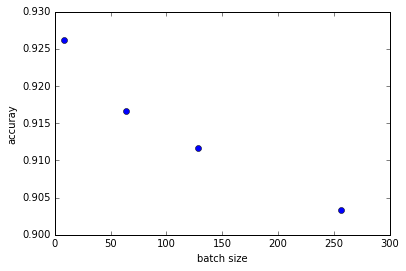

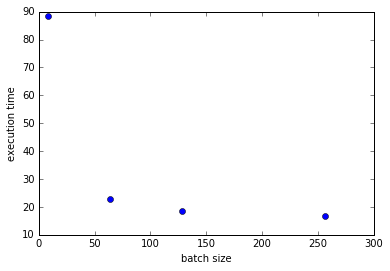

In [6]:
import matplotlib.pyplot as plt
plt.xlabel('batch size')
plt.ylabel('accuray')
plt.plot (batch_size_array, accuracy_array, "bo")
plt.show()



In [7]:
learning_rate_array = []
accuracy_array_2 = []
execution_time_array_2 = []

In [8]:
# Define paramaters for the model
learning_rate = 0.001
batch_size = 256
n_epochs = 30

# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
Y = tf.placeholder(tf.float32, [batch_size, 10], name='Y_placeholder')

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name="bias")

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
	# to visualize using TensorBoard
	writer = tf.summary.FileWriter('./logistic_reg', sess.graph)

	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	for i in range(n_epochs): # train the model n_epochs times
		total_loss = 0

		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			_, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print ('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print ('Total time: {0} seconds'.format(time.time() - start_time))
	execution_time_array_2.append(time.time() - start_time)

	print('Optimization Finished!') # should be around 0.35 after 25 epochs
	
	# test the model
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	for i in range(n_batches):
		print "Test:" + str(i)
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		_, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch}) 
		preds = tf.nn.softmax(logits_batch)
		correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
		accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
		total_correct_preds += sess.run(accuracy)
	print ('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
	learning_rate_array.append(learning_rate)
	accuracy_array_2.append(total_correct_preds/mnist.test.num_examples)
	writer.close()

Average loss epoch 0: 2.1856682891
Average loss epoch 1: 1.991021949
Average loss epoch 2: 1.82673790577
Average loss epoch 3: 1.6871477126
Average loss epoch 4: 1.56847461417
Average loss epoch 5: 1.46731051385
Average loss epoch 6: 1.38045088933
Average loss epoch 7: 1.30556854801
Average loss epoch 8: 1.24086762032
Average loss epoch 9: 1.1840812731
Average loss epoch 10: 1.13416659275
Average loss epoch 11: 1.09049865019
Average loss epoch 12: 1.0510584414
Average loss epoch 13: 1.01631662055
Average loss epoch 14: 0.984708480467
Average loss epoch 15: 0.956162339059
Average loss epoch 16: 0.930245869906
Average loss epoch 17: 0.906891780757
Average loss epoch 18: 0.88487257885
Average loss epoch 19: 0.864907923146
Average loss epoch 20: 0.846819619431
Average loss epoch 21: 0.829375026103
Average loss epoch 22: 0.814030111115
Average loss epoch 23: 0.798897449101
Average loss epoch 24: 0.785547350612
Average loss epoch 25: 0.772845564323
Average loss epoch 26: 0.760748447659
Avera

In [9]:
# Define paramaters for the model
learning_rate = 0.005
batch_size = 256
n_epochs = 30

# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
Y = tf.placeholder(tf.float32, [batch_size, 10], name='Y_placeholder')

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name="bias")

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
	# to visualize using TensorBoard
	writer = tf.summary.FileWriter('./logistic_reg', sess.graph)

	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	for i in range(n_epochs): # train the model n_epochs times
		total_loss = 0

		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			_, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print ('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print ('Total time: {0} seconds'.format(time.time() - start_time))
	execution_time_array_2.append(time.time() - start_time)

	print('Optimization Finished!') # should be around 0.35 after 25 epochs
	
	# test the model
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	for i in range(n_batches):
		print "Test:" + str(i)
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		_, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch}) 
		preds = tf.nn.softmax(logits_batch)
		correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
		accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
		total_correct_preds += sess.run(accuracy)
	print ('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
	learning_rate_array.append(learning_rate)
	accuracy_array_2.append(total_correct_preds/mnist.test.num_examples)
	writer.close()

Average loss epoch 0: 1.86835663898
Average loss epoch 1: 1.32666848475
Average loss epoch 2: 1.06252861608
Average loss epoch 3: 0.913274744125
Average loss epoch 4: 0.818547560233
Average loss epoch 5: 0.752463737938
Average loss epoch 6: 0.703202912184
Average loss epoch 7: 0.665299654007
Average loss epoch 8: 0.635289339262
Average loss epoch 9: 0.610439096238
Average loss epoch 10: 0.589529791864
Average loss epoch 11: 0.571540968162
Average loss epoch 12: 0.55628836712
Average loss epoch 13: 0.542863525938
Average loss epoch 14: 0.530911268614
Average loss epoch 15: 0.520604662249
Average loss epoch 16: 0.510839561853
Average loss epoch 17: 0.50189824458
Average loss epoch 18: 0.49457634874
Average loss epoch 19: 0.486779985445
Average loss epoch 20: 0.480466646569
Average loss epoch 21: 0.474257671109
Average loss epoch 22: 0.468625563606
Average loss epoch 23: 0.463211579858
Average loss epoch 24: 0.458170898328
Average loss epoch 25: 0.453423768839
Average loss epoch 26: 0.449

In [10]:
# Define paramaters for the model
learning_rate = 0.01
batch_size = 256
n_epochs = 30

# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
Y = tf.placeholder(tf.float32, [batch_size, 10], name='Y_placeholder')

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name="bias")

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
	# to visualize using TensorBoard
	writer = tf.summary.FileWriter('./logistic_reg', sess.graph)

	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	for i in range(n_epochs): # train the model n_epochs times
		total_loss = 0

		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			_, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print ('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print ('Total time: {0} seconds'.format(time.time() - start_time))
	execution_time_array_2.append(time.time() - start_time)

	print('Optimization Finished!') # should be around 0.35 after 25 epochs
	
	# test the model
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	for i in range(n_batches):
		print "Test:" + str(i)
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		_, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch}) 
		preds = tf.nn.softmax(logits_batch)
		correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
		accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
		total_correct_preds += sess.run(accuracy)
	print ('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
	learning_rate_array.append(learning_rate)
	accuracy_array_2.append(total_correct_preds/mnist.test.num_examples)
	writer.close()

Average loss epoch 0: 1.59055423124
Average loss epoch 1: 0.983943474348
Average loss epoch 2: 0.782968171846
Average loss epoch 3: 0.682900744621
Average loss epoch 4: 0.621636950803
Average loss epoch 5: 0.579455578717
Average loss epoch 6: 0.548591981424
Average loss epoch 7: 0.524860900139
Average loss epoch 8: 0.506038559931
Average loss epoch 9: 0.490147902169
Average loss epoch 10: 0.476671301177
Average loss epoch 11: 0.465197319322
Average loss epoch 12: 0.45567410669
Average loss epoch 13: 0.447231315982
Average loss epoch 14: 0.439147018105
Average loss epoch 15: 0.432593030768
Average loss epoch 16: 0.425939638063
Average loss epoch 17: 0.420588181537
Average loss epoch 18: 0.41545023414
Average loss epoch 19: 0.410967842162
Average loss epoch 20: 0.406103409618
Average loss epoch 21: 0.402630919608
Average loss epoch 22: 0.398479670565
Average loss epoch 23: 0.394983438409
Average loss epoch 24: 0.391734369865
Average loss epoch 25: 0.388789839973
Average loss epoch 26: 0.

In [11]:
# Define paramaters for the model
learning_rate = 0.02
batch_size = 256
n_epochs = 30

# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
Y = tf.placeholder(tf.float32, [batch_size, 10], name='Y_placeholder')

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name="bias")

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
	# to visualize using TensorBoard
	writer = tf.summary.FileWriter('./logistic_reg', sess.graph)

	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	for i in range(n_epochs): # train the model n_epochs times
		total_loss = 0

		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			_, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print ('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print ('Total time: {0} seconds'.format(time.time() - start_time))
	execution_time_array_2.append(time.time() - start_time)

	print('Optimization Finished!') # should be around 0.35 after 25 epochs
	
	# test the model
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	for i in range(n_batches):
		print "Test:" + str(i)
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		_, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch}) 
		preds = tf.nn.softmax(logits_batch)
		correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
		accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
		total_correct_preds += sess.run(accuracy)
	print ('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
	learning_rate_array.append(learning_rate)
	accuracy_array_2.append(total_correct_preds/mnist.test.num_examples)
	writer.close()

Average loss epoch 0: 1.28981293696
Average loss epoch 1: 0.733157825804
Average loss epoch 2: 0.600965766428
Average loss epoch 3: 0.537022705947
Average loss epoch 4: 0.498249946214
Average loss epoch 5: 0.471453175088
Average loss epoch 6: 0.451403551013
Average loss epoch 7: 0.435946516902
Average loss epoch 8: 0.423984667965
Average loss epoch 9: 0.413363233766
Average loss epoch 10: 0.404538378677
Average loss epoch 11: 0.397172022646
Average loss epoch 12: 0.39040199702
Average loss epoch 13: 0.384784560059
Average loss epoch 14: 0.379872345757
Average loss epoch 15: 0.374620151297
Average loss epoch 16: 0.370461242012
Average loss epoch 17: 0.366443469424
Average loss epoch 18: 0.363064062721
Average loss epoch 19: 0.360153037393
Average loss epoch 20: 0.35700030987
Average loss epoch 21: 0.354372577829
Average loss epoch 22: 0.351401376111
Average loss epoch 23: 0.348938499865
Average loss epoch 24: 0.346493235537
Average loss epoch 25: 0.344771744283
Average loss epoch 26: 0.

In [12]:
# Define paramaters for the model
learning_rate = 0.05
batch_size = 256
n_epochs = 30

# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
Y = tf.placeholder(tf.float32, [batch_size, 10], name='Y_placeholder')

# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name="bias")

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
	# to visualize using TensorBoard
	writer = tf.summary.FileWriter('./logistic_reg', sess.graph)

	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	for i in range(n_epochs): # train the model n_epochs times
		total_loss = 0

		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			_, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print ('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print ('Total time: {0} seconds'.format(time.time() - start_time))
	execution_time_array_2.append(time.time() - start_time)

	print('Optimization Finished!') # should be around 0.35 after 25 epochs
	
	# test the model
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	for i in range(n_batches):
		print "Test:" + str(i)
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		_, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch}) 
		preds = tf.nn.softmax(logits_batch)
		correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
		accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
		total_correct_preds += sess.run(accuracy)
	print ('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))
	learning_rate_array.append(learning_rate)
	accuracy_array_2.append(total_correct_preds/mnist.test.num_examples)
	writer.close()

Average loss epoch 0: 0.933667998448
Average loss epoch 1: 0.530496872613
Average loss epoch 2: 0.45788352275
Average loss epoch 3: 0.422086687428
Average loss epoch 4: 0.400255229986
Average loss epoch 5: 0.38375501641
Average loss epoch 6: 0.371956530715
Average loss epoch 7: 0.363133790755
Average loss epoch 8: 0.355587548185
Average loss epoch 9: 0.348884386298
Average loss epoch 10: 0.343335782465
Average loss epoch 11: 0.338786425922
Average loss epoch 12: 0.334381358994
Average loss epoch 13: 0.331282531477
Average loss epoch 14: 0.327182897828
Average loss epoch 15: 0.324579036264
Average loss epoch 16: 0.321704962822
Average loss epoch 17: 0.319513689274
Average loss epoch 18: 0.317029744665
Average loss epoch 19: 0.315155027208
Average loss epoch 20: 0.312656690793
Average loss epoch 21: 0.31083188387
Average loss epoch 22: 0.3095121094
Average loss epoch 23: 0.308124184608
Average loss epoch 24: 0.306185449326
Average loss epoch 25: 0.30469509242
Average loss epoch 26: 0.303

[16.53122115135193, 16.4654598236084, 17.512901067733765, 17.307039976119995, 16.571649074554443]
[0.001, 0.005, 0.01, 0.02, 0.05]
[0.85589999999999999, 0.89290000000000003, 0.90339999999999998, 0.91139999999999999, 0.91820000000000002]


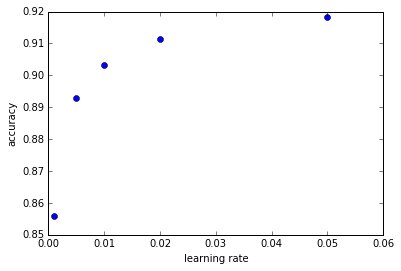

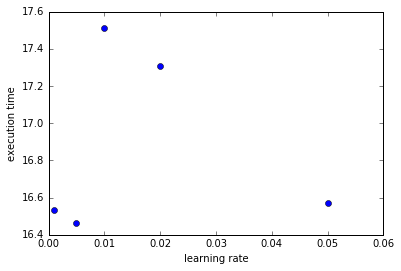

In [18]:
print execution_time_array_2
print learning_rate_array
print accuracy_array_2
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.plot (learning_rate_array, accuracy_array_2, "bo")
plt.show()

plt.xlabel('learning rate')
plt.ylabel('execution time')
plt.plot (learning_rate_array, execution_time_array_2, "bo")
plt.show()